# Liquor Sales using Linear Regression

# 1) Problem Statement

The primary goal of this project is to contribute to the expansion plans of a liquor store owner in Iowa, by investigating the market data for potential new locations. 

Furthermore, he is interested in understanding details of the best model that we can fit to the data so that her team can optimally evaluate possible sites for a new storefront.

More concretely, we will predict total sales by county. Note that this is a cross-sectional analysis and no temporal behavior is considered.

# 2) Preamble

Expansion plans traditionally use subsets of the following mix of data:

### 2.1) Demographics

Demographic information can be introduced in a high level of detail (see for example Ref. [1] for an interesting analysis and useful public datasets). Here we will not delve so deeply into that, but some simple demographical data will be used (namely information about income and population). 

We will be interested in several ratios. 

i) The first one is the ratio $r_{{\rm{sv}}}^{(c)}$ between sales and volume for each county i.e. the amount of dollars per liter sold. If $r_{{\rm{sv}}}^{(c)}$ is high in county $(c)$, the stores in that county are, on average, high-end stores. The ratio is given by:

\begin{eqnarray}
r_{{\text{sv}}}^{(c)} = \frac{{{\text{sales in }}c}}{{{\text{volume consumed in }}c}}\,\,\,\,\,\,(1)\nonumber
\end{eqnarray}


(where the upper index $(c)$ is for county). 

ii) Another relevant ratio is the number of stores per area:

\begin{eqnarray}
r_{\text{sa}}^{(c)}=\frac{{\text{number of stores in }}c}{{\text{area of }}c}\,\,\,\,\,(2)\nonumber
\end{eqnarray}
   
The meaning of a high value of $r_{\rm{sa}}^{(c)}$ is not so straightforward since it may indicate either 
   - That the market saturated or 
   - That the county has an extremely strong market which would welcome a new store (an example would be a county close to some major university as discussed in Ref. [3]). 
   
In contrast, a low value of $r_{\rm{sa}}^{(c)}$ may indicate a market with untapped potential or a market with a population not very interested in this type of store (for example, a county with highly religious population).

iii) Another important ratio is consumption/population i.e. the consumption *per capita*:

\begin{eqnarray}
r_{\text{cp}}^{(c)}=\frac{{\text{number of liters consumed in }}c}{{\text{population of }}c}\,\,\,\,\,(3)\nonumber
\end{eqnarray}

The knowledge of the profile of the population in the county (if they are "light" or "heavy" drinkers) would certainly help the owner decide whether to open or not a new storefront there (see Ref. [1,2,3]).

 
### 2.2) Nearby businesses

Competition is a critical component, and can be indirectly measured by the ratio of the number of stores and the population in a given county $c$:
    
\begin{eqnarray}
r_{\text{sp}}^{(c)}=\frac{{\text{number of stores in }}c}{{\text{population of }}c}\,\,\,\,\,(4)\nonumber
\end{eqnarray}

### 2.3) Aggregated human ﬂow/foot traffic

For this information to be useful we would need more granular data (such as apps check-ins as discussed in [7]). Population and population density will be used as proxies.

There is an issue with the meaning of the data that is discussed in the appendix (see the end of the notebook).

# 3) Getting data

Let us take a look at the data. The dataset contains the spirits purchase information of Iowa Class “E” liquor licensees by product and date of purchase.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)   # Used to display all columns
df_raw = pd.read_csv('iowa_liquor_sales_proj_2.csv')
df_raw.head()

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Invoice/Item Number        Date  Store Number  \
0        S29198800001  11/20/2015          2191   
1        S29195400002  11/21/2015          2205   
2        S29050300001  11/16/2015          3549   
3        S28867700001  11/04/2015          2513   
4        S29050800001  11/17/2015          3942   

                         Store Name              Address          City  \
0                    Keokuk Spirits            1013 MAIN        KEOKUK   
1            Ding's Honk And Holler     900 E WASHINGTON      CLARINDA   
2              Quicker Liquor Store         1414 48TH ST  FORT MADISON   
3  Hy-Vee Food Store #2 / Iowa City       812  S 1ST AVE     IOWA CITY   
4                  Twin Town Liquor  104 HIGHWAY 30 WEST        TOLEDO   

  Zip Code                                     Store Location  County Number  \
0    52632    1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)           56.0   
1    51632  900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...           73.0   
2    52627  1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...           56.0   
3    52240                   812 S 1ST AVE\nIOWA CITY 52240\n           52.0   
4    52342  104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...           86.0   

    County  Category Category Name  Vendor Number  \
0      Lee       NaN           NaN            255   
1     Page       NaN           NaN            255   
2      Lee       NaN           NaN            130   
3  Johnson       NaN           NaN             65   
4     Tama       NaN           NaN            130   

                   Vendor Name  Item Number  \
0          Wilson Daniels Ltd.          297   
1          Wilson Daniels Ltd.          297   
2  Disaronno International LLC          249   
3              Jim Beam Brands          237   
4  Disaronno International LLC          249   

                                Item Description  Pack  Bottle Volume (ml)  \
0                          Templeton Rye w/Flask     6                 750   
1                          Templeton Rye w/Flask     6                 750   
2  Disaronno Amaretto Cavalli Mignon 3-50ml Pack    20                 150   
3                 Knob Creek w/ Crystal Decanter     3                1750   
4  Disaronno Amaretto Cavalli Mignon 3-50ml Pack    20                 150   

  State Bottle Cost State Bottle Retail  Bottles Sold Sale (Dollars)  \
0            $18.09              $27.14             6        $162.84   
1            $18.09              $27.14            12        $325.68   
2             $6.40               $9.60             2         $19.20   
3            $35.55              $53.34             3        $160.02   
4             $6.40               $9.60             2         $19.20   

   Volume Sold (Liters)  Volume Sold (Gallons)  
0                  4.50                   1.19  
1                  9.00                   2.38  
2                  0.30                   0.08  
3                  5.25                   1.39  
4                  0.30                   0.08

In [2]:
from __future__ import division
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
import math
import itertools

## 1) Data Munging and EDA

### a) Checking the time span of the data and dropping 2016 data

It is often convenient to eliminate spaces, commas, etc:

In [3]:
df = df_raw.copy()
df.columns = [c.replace('/','_').replace(' ','_').replace(')','').replace('(','').lower() for c in df.columns.tolist()]

Let us see how many years and months for each year we have. 

- We first convert the data to `datatime`. 
- Using the class attribute `.year` we see that there is data for only two years, namely, 2015 and 2016. 
- Using the class attribute `.month` we see that the data includes 12 months of 2015 but only 3 months of 2016. 

For simplicity we will work only with 2015 data (this restriction can be easily generalized if need be).

In [4]:
df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y")
print "The years in the data are:", df['date'].dt.year.unique()

The years in the data are: [2015 2016]


In [5]:
for yr in [2015,2016]:
    print "The months in year {}".format(yr),"are", sorted(df[df['date'].dt.year == yr]['date'].dt.month.unique())

The months in year 2015 are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The months in year 2016 are [1, 2, 3]


In [6]:
df = df[(df['date'] < '2016-01-01')]
df.shape

(2184483, 24)

In [7]:
print "The fraction of 2016 data is:", round(df.shape[0]/df_raw.shape[0],2)

The fraction of 2016 data is: 0.81


### b) Selecting rows and columns to keep

This is a rather large dataset and we can eliminate rows and columns that will not be used. 

In [8]:
print "The number of rows and number of columns are:"
print ""
print df.shape[0],"and",df.shape[1]

The number of rows and number of columns are:

2184483 and 24


We will, for now, keep the following columns for the following reasons:

    ['store_number','county','bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',\
                'bottles_sold', 'sale_dollars', 'volume_sold_liters']

The date will be dropped since we will not perform any time series analysis.

In [9]:
cols_to_keep = ['store_number','county','bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',\
                'bottles_sold', 'sale_dollars', 'volume_sold_liters']

df = df[cols_to_keep]

### c) Eliminating symbols in the data, dropping `NaNs` and converting objects to floats

We will:

- Exclude symbols from the DataFrame. Some of the columns include the symbol $\$$ which naturally does not allow for algebraic manipulation. There are several elegant ways to exclude it (see [4]). 
- Convert columns of objects into columns of floats.
- Drop `NaN` values. 

Two ways of excluding dollar signs are:

        1) [x[1:] for x in df['state_bottle_cost']]
    
        2) df['state_bottle_cost'].apply(lambda x: x.strip('$'))
    
We will go with option 2.

In [10]:
cols_with_dollar = ['state_bottle_cost','state_bottle_retail','sale_dollars']
for col in cols_with_dollar:
    df[col] = df[col].apply(lambda x: x.strip('$')).astype('float')

In [11]:
df.dtypes

store_number             int64
county                  object
bottle_volume_ml         int64
state_bottle_cost      float64
state_bottle_retail    float64
bottles_sold             int64
sale_dollars           float64
volume_sold_liters     float64
dtype: object

The commands in the cells below check for:
- The existence of `NaN` values
- How many `NaN` values there are 
- How frequent they are. 

We find that only a tiny fraction of the entries in the `county` column is null, which is not problematic. We will drop them.

In [12]:
null = df.isnull().any() # Column of boolens determining presence of nulls
print "Which colune has null values?",null[null == True].index[0]
print "Number of null values in", null[null == True].index[0], "is:",df.isnull().sum().loc['county']
print "Frequency of null values:", str(100*round(100 * df.isnull().sum().loc['county']/df.shape[0],5)) +'%'

Which colune has null values? county
Number of null values in county is: 1119
Frequency of null values: 5.122%


In [13]:
df.dropna(inplace=True)

### d) Convert store numbers to strings

We convert `store_numbers` to strings:

In [14]:
df[['store_number']] = df[['store_number']].astype(str)

Our `DataFrame` is now:

In [15]:
df.head()

store_number   county  bottle_volume_ml  state_bottle_cost  \
0         2191      Lee               750              18.09   
1         2205     Page               750              18.09   
2         3549      Lee               150               6.40   
3         2513  Johnson              1750              35.55   
4         3942     Tama               150               6.40   

   state_bottle_retail  bottles_sold  sale_dollars  volume_sold_liters  
0                27.14             6        162.84                4.50  
1                27.14            12        325.68                9.00  
2                 9.60             2         19.20                0.30  
3                53.34             3        160.02                5.25  
4                 9.60             2         19.20                0.30

### e) Look for problematic issues with the data

We use `.describe( )` below to better understand the data. 

In [16]:
# the 'count' row is not very useful and the store_number column is meaningless in this table
df.describe().iloc[1:,1:]   

state_bottle_cost  state_bottle_retail  bottles_sold   sale_dollars  \
mean           9.816396            14.742246      9.877354     130.182613   
std           14.626429            21.939393     23.699125     405.568937   
min            0.890000             1.340000      1.000000       1.340000   
25%            5.540000             8.310000      2.000000      30.720000   
50%            8.180000            12.300000      6.000000      70.560000   
75%           11.960000            17.940000     12.000000     135.360000   
max         6100.000000          9150.000000   3960.000000  106326.000000   

      volume_sold_liters  
mean            8.981275  
std            28.355651  
min             0.000000  
25%             1.600000  
50%             5.250000  
75%            10.500000  
max          3960.000000

Let us look at histograms. We will use the following function (adapted from [1]):

In [17]:
def draw_histograms(df,col,bins):
    df[col].hist(bins=bins);
    plt.title(col);
    plt.xlabel(col);
    plt.xticks(rotation=90);
    plt.show();
    print

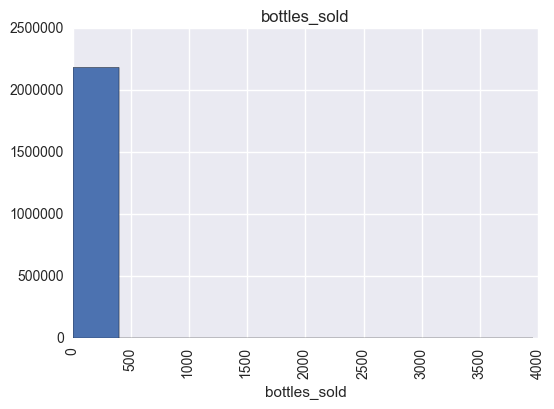

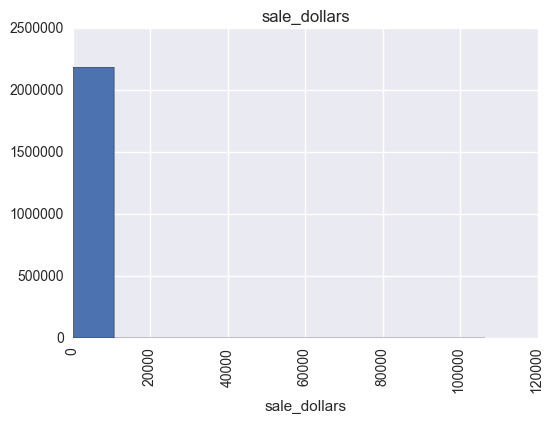

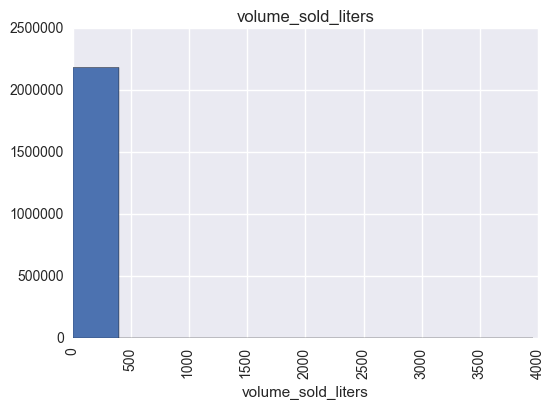

In [18]:
cols = ['bottles_sold', 'sale_dollars', 'volume_sold_liters']
for col in cols:
    draw_histograms(df, col,bins=10)

There are some obvious problems:
- In the columns `bottle_volume_ml` and `volume_sold_liters` there are zero values which can be dropped
- The maximum values are many $\sigma$s larger than the mean for all columns, indicating outliers. Let us drop some outliers. We will choose to restrict some of the columns. We will drop values roughly 2$\sigma$ larger than the means.


### f) Exclude outliers


Keeping outliers in our analysis will inflate the predicted sales. Also, we intend to predict the most likely performance for each store. In other words, we do not want to use exceptionally well-performing stores to make recommendations.  

In [19]:
df1 = df.copy()
print np.mean(df1['bottles_sold'])+ 2*np.std(df1['bottles_sold'])
print np.mean(df1['sale_dollars'])+ 2*np.std(df1['sale_dollars'])
print np.mean(df1['volume_sold_liters'])+ 2*np.std(df1['volume_sold_liters'])

57.2755933042
941.320301085
65.6925625834


Let us correct these:

In [20]:
df1 = df.copy()
cutoffs = (df1['bottle_volume_ml'] > 0) & (df1['bottles_sold'] < 50) & (df1['volume_sold_liters'] < 60) & (df1['sale_dollars'] < 900)
df1 = df1[cutoffs]

In [21]:
df1.describe().iloc[1:,1:]

state_bottle_cost  state_bottle_retail  bottles_sold  sale_dollars  \
mean           9.745472            14.635677      7.968786     99.364086   
std            6.995164            10.492340      7.830878    100.784662   
min            0.890000             1.340000      1.000000      1.340000   
25%            5.510000             8.270000      2.000000     30.000000   
50%            8.000000            12.000000      6.000000     68.640000   
75%           11.830000            17.750000     12.000000    132.780000   
max          498.640000           747.960000     48.000000    899.980000   

      volume_sold_liters  
mean            6.864374  
std             6.635848  
min             0.100000  
25%             1.500000  
50%             4.800000  
75%            10.500000  
max            54.000000

Let us look again at histograms. 

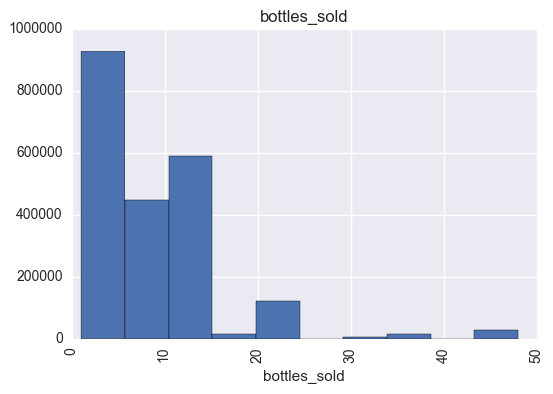

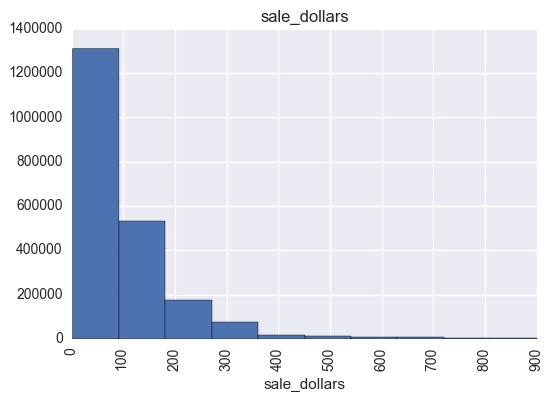

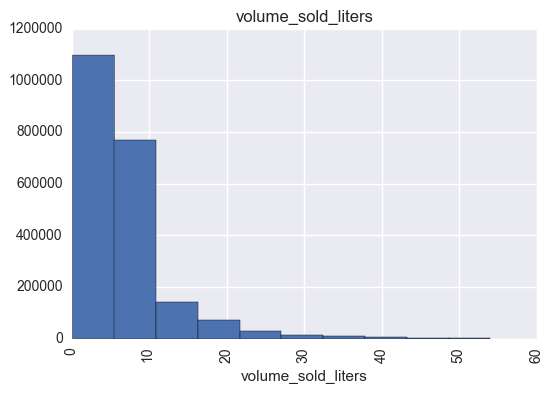

In [22]:
cols = ['bottles_sold', 'sale_dollars', 'volume_sold_liters']
for col in cols:
    draw_histograms(df1, col,bins=10)

# 5) Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.


### a) Aggregating data by county, computing total number of stores and total sales

To obtain the ratios (1)-(4) we need the counties' areas, their populations and the number of stores in them. Let us count the number of stores per county:

In [180]:
df2 = df1.copy()
stores_per_county = df2.groupby(['county'])['store_number'].count()
print stores_per_county.sum()
stores_per_county.head()

2143329


county
Adair        4420
Adams        1797
Allamakee    8595
Appanoose    8582
Audubon      2045
Name: store_number, dtype: int64

In [181]:
df1.columns

Index([u'store_number', u'county', u'bottle_volume_ml', u'state_bottle_cost',
       u'state_bottle_retail', u'bottles_sold', u'sale_dollars',
       u'volume_sold_liters'],
      dtype='object')

Let us computer total sales per county:

### b) Create profit column

Let us first include the profit:

In [182]:
df2['profit'] = (df2['state_bottle_retail'] - df2['state_bottle_cost'])*df2["bottles_sold"]
df2.head()

store_number   county  bottle_volume_ml  state_bottle_cost  \
0         2191      Lee               750              18.09   
1         2205     Page               750              18.09   
2         3549      Lee               150               6.40   
3         2513  Johnson              1750              35.55   
4         3942     Tama               150               6.40   

   state_bottle_retail  bottles_sold  sale_dollars  volume_sold_liters  profit  
0                27.14             6        162.84                4.50   54.30  
1                27.14            12        325.68                9.00  108.60  
2                 9.60             2         19.20                0.30    6.40  
3                53.34             3        160.02                5.25   53.37  
4                 9.60             2         19.20                0.30    6.40

### c) Count stores per county

In [183]:
cols = ['county', 'bottle_volume_ml', 'state_bottle_cost', \
        'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'profit']

In [184]:
df_county = df2[cols].groupby(['county']).sum()

In [185]:
df_county.head()

bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
county                                                                
Adair               4455875           40182.62             60373.69   
Adams               1757403           18103.82             27171.39   
Allamakee           9079175           85371.49            128238.38   
Appanoose           8360175           82458.44            123839.97   
Audubon             2043175           17737.11             26656.07   

           bottles_sold  sale_dollars  volume_sold_liters     profit  
county                                                                
Adair             33807     410805.62            32522.35  137466.12  
Adams              8446     100596.80             7547.62   33614.78  
Allamakee         57833     772843.46            61269.76  258630.44  
Appanoose         58261     711376.15            53184.66  237792.71  
Audubon           13978     159547.63            13215.43   53393.70

In [186]:
df_county['num_stores'] = stores_per_county
df_county.reset_index(level=0, inplace=True)
df_county.head()

county  bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
0      Adair           4455875           40182.62             60373.69   
1      Adams           1757403           18103.82             27171.39   
2  Allamakee           9079175           85371.49            128238.38   
3  Appanoose           8360175           82458.44            123839.97   
4    Audubon           2043175           17737.11             26656.07   

   bottles_sold  sale_dollars  volume_sold_liters     profit  num_stores  
0         33807     410805.62            32522.35  137466.12        4420  
1          8446     100596.80             7547.62   33614.78        1797  
2         57833     772843.46            61269.76  258630.44        8595  
3         58261     711376.15            53184.66  237792.71        8582  
4         13978     159547.63            13215.43   53393.70        2045

In [187]:
df_county.isnull().any()

county                 False
bottle_volume_ml       False
state_bottle_cost      False
state_bottle_retail    False
bottles_sold           False
sale_dollars           False
volume_sold_liters     False
profit                 False
num_stores             False
dtype: bool

### d) Calculation of the profit per store

In [189]:
df_county['average_store_profit'] = df_county['profit']/df_county['num_stores']

In [190]:
df_county.head()

county  bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
0      Adair           4455875           40182.62             60373.69   
1      Adams           1757403           18103.82             27171.39   
2  Allamakee           9079175           85371.49            128238.38   
3  Appanoose           8360175           82458.44            123839.97   
4    Audubon           2043175           17737.11             26656.07   

   bottles_sold  sale_dollars  volume_sold_liters     profit  num_stores  \
0         33807     410805.62            32522.35  137466.12        4420   
1          8446     100596.80             7547.62   33614.78        1797   
2         57833     772843.46            61269.76  258630.44        8595   
3         58261     711376.15            53184.66  237792.71        8582   
4         13978     159547.63            13215.43   53393.70        2045   

   average_store_profit  
0             31.100932  
1             18.706055  
2             30.090802  
3             27.708309  
4             26.109389

In [191]:
df_county.isnull().any()

county                  False
bottle_volume_ml        False
state_bottle_cost       False
state_bottle_retail     False
bottles_sold            False
sale_dollars            False
volume_sold_liters      False
profit                  False
num_stores              False
average_store_profit    False
dtype: bool

### e) Calculation sales per volume $r_{{\rm{sv}}}^{(c)}$

In [192]:
df_county['sales_per_litters'] = df_county['sale_dollars']/df_county['volume_sold_liters']

### f) Cut-offs in the aggregate DataFrame

In [193]:
df_county.describe().loc[['mean','std','max']]

bottle_volume_ml  state_bottle_cost  state_bottle_retail  bottles_sold  \
mean      1.994879e+07       2.109874e+05         3.168593e+05  1.725225e+05   
std       4.068975e+07       4.620609e+05         6.938726e+05  4.054011e+05   
max       3.376040e+08       3.868235e+06         5.808917e+06  3.319741e+06   

      sale_dollars  volume_sold_liters        profit     num_stores  \
mean  2.151211e+06        1.486122e+05  7.188647e+05   21649.787879   
std   4.974648e+06        3.237530e+05  1.662030e+06   46543.944487   
max   4.132447e+07        2.673001e+06  1.380706e+07  383547.000000   

      average_store_profit  sales_per_litters  
mean             30.170016          13.382942  
std               6.068482           0.999601  
max              44.859888          15.770199

Consider histograms again:

In [194]:
print df_county.columns.tolist()

['county', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'profit', 'num_stores', 'average_store_profit', 'sales_per_litters']


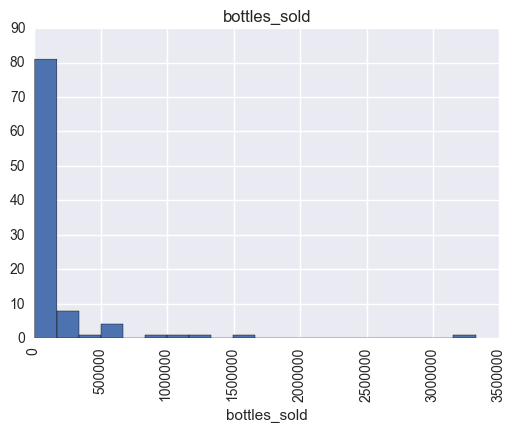

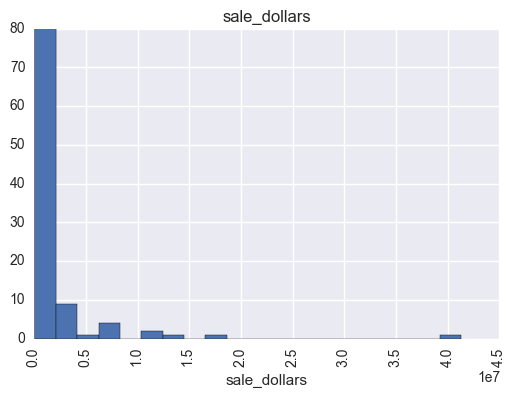

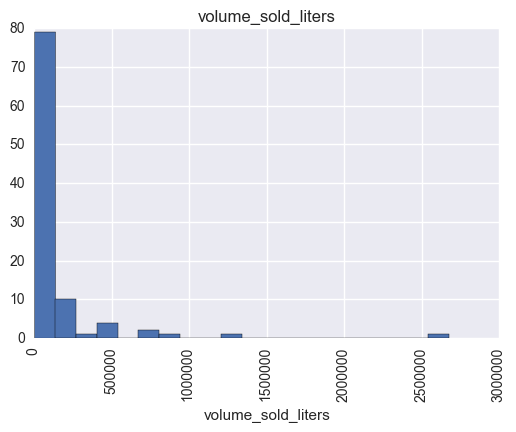

In [195]:
cols = ['bottles_sold', 'sale_dollars', 'volume_sold_liters']
for col in cols:
    draw_histograms(df_county, col,bins=20)

There are two clear outliers which we can remove:

In [196]:
print df_county['bottles_sold'].sort_values(ascending=False).head()
print ""
print df_county.iloc[76].loc['county']

76    3319741
56    1500058
81    1237025
6     1093412
51     927749
Name: bottles_sold, dtype: int64

Polk


In [197]:
print df_county['bottles_sold'].sort_values(ascending=True).head()
print ""
print df_county.iloc[35].loc['county']

35    2512
25    7746
92    8283
1     8446
86    9360
Name: bottles_sold, dtype: int64

Fremont


In [198]:
conditions = (df_county['county'] != 'Polk') & (df_county['county'] != 'Fremont')
df_county = df_county[conditions]

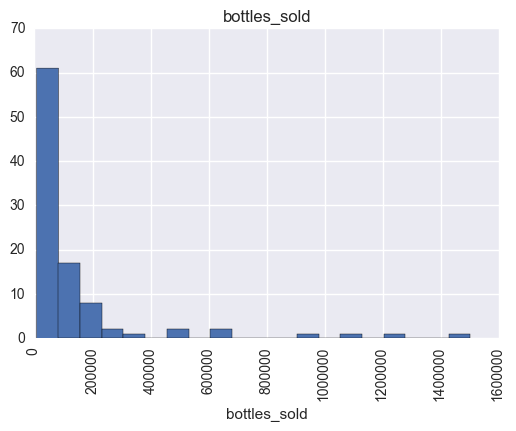

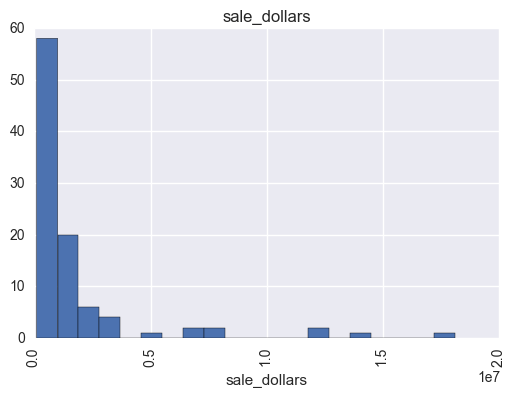

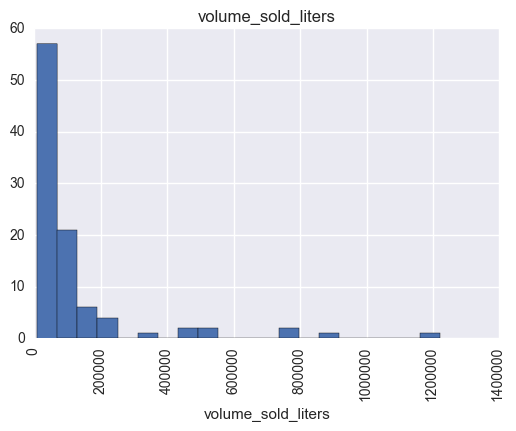

In [200]:
cols = ['bottles_sold', 'sale_dollars', 'volume_sold_liters']
for col in cols:
    draw_histograms(df_county, col,bins=20)

In [201]:
df_county.head()

county  bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
0      Adair           4455875           40182.62             60373.69   
1      Adams           1757403           18103.82             27171.39   
2  Allamakee           9079175           85371.49            128238.38   
3  Appanoose           8360175           82458.44            123839.97   
4    Audubon           2043175           17737.11             26656.07   

   bottles_sold  sale_dollars  volume_sold_liters     profit  num_stores  \
0         33807     410805.62            32522.35  137466.12        4420   
1          8446     100596.80             7547.62   33614.78        1797   
2         57833     772843.46            61269.76  258630.44        8595   
3         58261     711376.15            53184.66  237792.71        8582   
4         13978     159547.63            13215.43   53393.70        2045   

   average_store_profit  sales_per_litters  
0             31.100932          12.631486  
1             18.706055          13.328281  
2             30.090802          12.613783  
3             27.708309          13.375589  
4             26.109389          12.072829

### g) Including population data 

To obtain both $r_{\rm{sp}}^{(c)}$ (stores per person) and $r_{\rm{cp}}^{(c)}$ (alcohol consumption per person) we need data about the population of each county. This dataset is taken from [5]. These are 2016 population estimates (which will be discussed later).

In [230]:
pop = pd.read_csv('pop_iowa_per_county.csv')
del pop['Unnamed: 0']
pop = pop[pop['county'] != 'Polk']
pop = pop[pop['county'] != 'Fremont']
pop.head()

county  population
0      Adair        7092
1      Adams        3693
2  Allamakee       13884
3  Appanoose       12462
4    Audubon        5678

In [231]:
pop.isnull().any()

county        False
population    False
dtype: bool

We now append to our dataset columns of population, population per store and consumption per store:

In [263]:
df_new = df_county.copy()
df_new = pd.merge(df_new, pop, on= 'county', how='outer')

In [264]:
df_new.isnull().any()

county                  False
bottle_volume_ml        False
state_bottle_cost       False
state_bottle_retail     False
bottles_sold            False
sale_dollars            False
volume_sold_liters      False
profit                  False
num_stores              False
average_store_profit    False
sales_per_litters       False
population              False
dtype: bool

### h) Calculation of ratios $r_{\rm{cp}}^{(c)}$ and $r_{\rm{sp}}^{(c)}$

In [265]:
df_new['store_population_ratio'] = df_new['num_stores']/df_new['population']
df_new['consumption_per_capita'] = df_new['volume_sold_liters']/df_new['population']

In [266]:
df_new.isnull().any()

county                    False
bottle_volume_ml          False
state_bottle_cost         False
state_bottle_retail       False
bottles_sold              False
sale_dollars              False
volume_sold_liters        False
profit                    False
num_stores                False
average_store_profit      False
sales_per_litters         False
population                False
store_population_ratio    False
consumption_per_capita    False
dtype: bool

It is a good idea to export this DataFrame to keep after so many changes: 

In [267]:
df_new.to_csv('df_new.csv')

### i) Including area data

We not import a table containing among other things, areas per county (source [1]):

In [268]:
pd.set_option('display.max_rows', None)

areas = pd.read_csv('ia_zip_city_county_sqkm.csv')
del areas['Unnamed: 0']
areas.columns = ['zip_code', 'city', 'county', 'state', 'county_number', 'area']
areas = areas[['county','area']].groupby(['county'])[['area']].sum()
areas.reset_index(level=0, inplace=True)
areas = areas[(areas['county'] != 'Polk') & (areas['county'] != 'Fremont')]
areas

county         area
0           Adair  1146.149874
1           Adams   950.420482
2       Allamakee  1640.663925
3       Appanoose  1439.625361
4         Audubon  1011.305224
5          Benton  1589.039934
6      Black Hawk  1658.463133
7           Boone  1172.618576
8          Bremer  1254.612988
9        Buchanan  1437.306002
10    Buena Vista  1641.768588
11         Butler  1714.432829
12        Calhoun  1593.242060
13        Carroll  1790.407255
14           Cass  1776.544213
15          Cedar  1232.378198
16    Cerro Gordo  1497.770139
17       Cherokee  1404.657609
18      Chickasaw  1332.800885
19         Clarke   954.543677
20           Clay  1305.389452
21        Clayton  2086.377422
22        Clinton  1701.089895
23       Crawford  1794.525720
24         Dallas  1727.389531
25          Davis  1202.497109
26        Decatur  1443.427332
27       Delaware  1275.461107
28     Des Moines   928.456413
29      Dickinson  1024.114722
30        Dubuque  1445.975306
31          Emmet  1130.769046
32        Fayette  1955.698767
33          Floyd  1245.579774
34       Franklin  1346.541996
36         Greene  1385.511780
37         Grundy  1097.912646
38        Guthrie  1659.326695
39       Hamilton  1425.376163
40        Hancock  1435.986414
41         Hardin  1749.403531
42       Harrison  2000.716609
43          Henry  1374.637080
44         Howard  1553.199575
45       Humboldt  1325.822767
46            Ida  1061.883800
47           Iowa  1448.032410
48        Jackson  2075.514783
49         Jasper  1677.247032
50      Jefferson  1228.460352
51        Johnson  1374.398467
52          Jones  1603.902991
53         Keokuk  1568.990538
54        Kossuth  2171.379858
55            Lee  1207.589119
56           Linn  2164.866374
57         Louisa   980.907015
58          Lucas  1154.264969
59           Lyon  1520.471701
60        Madison  1409.747269
61        Mahaska  1216.496254
62         Marion  1528.879832
63       Marshall  1520.107767
64          Mills  1220.953340
65       Mitchell  1086.794650
66         Monona  1656.794562
67         Monroe   960.814655
68     Montgomery  1140.359482
69      Muscatine  1700.941831
70        O'Brien  1620.431744
71        Osceola   967.452680
72           Page  1398.118634
73      Palo Alto  1596.128377
74       Plymouth  2259.953641
75     Pocahontas  1297.431413
77  Pottawattamie  2303.225231
78      Poweshiek  1580.076857
79       Ringgold  1198.624350
80            Sac  1412.599164
81          Scott  1211.649675
82         Shelby  1299.197014
83          Sioux  2056.178194
84          Story  1943.690095
85           Tama  2088.226617
86         Taylor  1571.159542
87          Union  1292.945614
88      Van Buren  1549.129170
89        Wapello  1104.862750
90         Warren  1617.493665
91     Washington  1666.506696
92          Wayne  1438.930980
93        Webster  1793.295141
94      Winnebago  1295.390700
95     Winneshiek  1587.428273
96       Woodbury  2591.144872
97          Worth   925.069678
98         Wright  1542.560045

In [269]:
df_new = pd.merge(df_new, areas, on= 'county', how='outer')

In [270]:
df_new

county  bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
0           Adair           4455875           40182.62         6.037369e+04   
1           Adams           1757403           18103.82         2.717139e+04   
2       Allamakee           9079175           85371.49         1.282384e+05   
3       Appanoose           8360175           82458.44         1.238400e+05   
4         Audubon           2043175           17737.11         2.665607e+04   
5          Benton           7790725           71349.04         1.071595e+05   
6      Black Hawk         100801227         1107541.37         1.663275e+06   
7           Boone          16005831          154407.11         2.319393e+05   
8          Bremer          17767453          173326.87         2.603925e+05   
9        Buchanan          12168450          121504.75         1.824907e+05   
10    Buena Vista          20832831          226554.99         3.402451e+05   
11         Butler           3348800           27994.24         4.206102e+04   
12        Calhoun           3787450           30301.41         4.553630e+04   
13        Carroll          14460725          143097.04         2.149119e+05   
14           Cass          10038675           98657.96         1.481477e+05   
15          Cedar           7427125           67426.72         1.013055e+05   
16    Cerro Gordo          50439956          514818.96         7.732206e+05   
17       Cherokee           7638400           72195.69         1.084669e+05   
18      Chickasaw           4325975           37139.09         5.580234e+04   
19         Clarke           5656450           54720.08         8.218209e+04   
20           Clay          15084525          151187.65         2.270741e+05   
21        Clayton          11180875          108046.71         1.622809e+05   
22        Clinton          25808600          255757.84         3.841091e+05   
23       Crawford           9178228           91880.62         1.379796e+05   
24         Dallas          19782703          208239.38         3.128030e+05   
25          Davis           1623500           14206.10         2.134244e+04   
26        Decatur           1798250           17836.60         2.679681e+04   
27       Delaware           5929650           56982.70         8.557961e+04   
28     Des Moines          28965403          311376.14         4.674807e+05   
29      Dickinson          27326006          291810.42         4.382073e+05   
30        Dubuque          57322060          601825.15         9.038367e+05   
31          Emmet           5982525           60879.97         9.144739e+04   
32        Fayette           9109128           81374.00         1.222869e+05   
33          Floyd           8058678           79010.19         1.186743e+05   
34       Franklin           6146325           60180.12         9.038277e+04   
35         Greene           5200525           53392.20         8.019890e+04   
36         Grundy           4369250           36670.31         5.510175e+04   
37        Guthrie           3493600           31390.41         4.717285e+04   
38       Hamilton           7882325           77319.08         1.161721e+05   
39        Hancock           3509425           28221.14         4.241179e+04   
40         Hardin          15096700          136991.10         2.058020e+05   
41       Harrison           8333900           82437.45         1.238054e+05   
42          Henry           8214425           84936.53         1.275347e+05   
43         Howard           5501853           50667.53         7.612342e+04   
44       Humboldt           4838675           46974.26         7.055336e+04   
45            Ida           4907150           49504.88         7.433259e+04   
46           Iowa          11862800          102657.53         1.542814e+05   
47        Jackson          12728325          114843.67         1.724907e+05   
48         Jasper          21363900          214003.36         3.214453e+05   
49      Jefferson           6377025           66329.72       

In [271]:
df_new.isnull().any()

county                    False
bottle_volume_ml          False
state_bottle_cost         False
state_bottle_retail       False
bottles_sold              False
sale_dollars              False
volume_sold_liters        False
profit                    False
num_stores                False
average_store_profit      False
sales_per_litters         False
population                False
store_population_ratio    False
consumption_per_capita    False
area                      False
dtype: bool

### j) Calculate stores per area $r_{\rm{sa}}^{(c)}$

In [272]:
df_new['stores_per_area'] = df_new['num_stores']/df_new['area']

In [273]:
df_new.head()

county  bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
0      Adair           4455875           40182.62             60373.69   
1      Adams           1757403           18103.82             27171.39   
2  Allamakee           9079175           85371.49            128238.38   
3  Appanoose           8360175           82458.44            123839.97   
4    Audubon           2043175           17737.11             26656.07   

   bottles_sold  sale_dollars  volume_sold_liters     profit  num_stores  \
0         33807     410805.62            32522.35  137466.12        4420   
1          8446     100596.80             7547.62   33614.78        1797   
2         57833     772843.46            61269.76  258630.44        8595   
3         58261     711376.15            53184.66  237792.71        8582   
4         13978     159547.63            13215.43   53393.70        2045   

   average_store_profit  sales_per_litters  population  \
0             31.100932          12.631486        7092   
1             18.706055          13.328281        3693   
2             30.090802          12.613783       13884   
3             27.708309          13.375589       12462   
4             26.109389          12.072829        5678   

   store_population_ratio  consumption_per_capita         area  \
0                0.623237                4.585780  1146.149874   
1                0.486596                2.043764   950.420482   
2                0.619058                4.412976  1640.663925   
3                0.688654                4.267747  1439.625361   
4                0.360162                2.327480  1011.305224   

   stores_per_area  
0         3.856389  
1         1.890742  
2         5.238733  
3         5.961273  
4         2.022139

In [274]:
# Taking care of outliers:
#df4 = df4[df4['County'] != 'Fremont']
#df4 = df2[df4['County'] != 'Davis']

### l) Download a database about incomes:

In [275]:
income = pd.read_excel('iowa_incomes.xls')
col_names = [c.replace('/','_').replace(' ','_').replace(')','').replace('(','').lower() for c in income.columns.tolist()]
income.columns = col_names
income.head(5)

county  per_capita_income  median_household_income  \
0      Adair              23497                    45202   
1      Adams              23549                    40368   
2  Allamakee              21349                    46623   
3  Appanoose              20084                    34689   
4    Audubon              24207                    42717   

   median_family_income  number_of_households  
0                 57287                  3292  
1                 52782                  1715  
2                 55926                  5845  
3                 41250                  5627  
4                 58641                  2617

In [276]:
df_new = df_new.merge(income, how='left', on='county')
df_new.head()

county  bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
0      Adair           4455875           40182.62             60373.69   
1      Adams           1757403           18103.82             27171.39   
2  Allamakee           9079175           85371.49            128238.38   
3  Appanoose           8360175           82458.44            123839.97   
4    Audubon           2043175           17737.11             26656.07   

   bottles_sold  sale_dollars  volume_sold_liters     profit  num_stores  \
0         33807     410805.62            32522.35  137466.12        4420   
1          8446     100596.80             7547.62   33614.78        1797   
2         57833     772843.46            61269.76  258630.44        8595   
3         58261     711376.15            53184.66  237792.71        8582   
4         13978     159547.63            13215.43   53393.70        2045   

   average_store_profit  sales_per_litters  population  \
0             31.100932          12.631486        7092   
1             18.706055          13.328281        3693   
2             30.090802          12.613783       13884   
3             27.708309          13.375589       12462   
4             26.109389          12.072829        5678   

   store_population_ratio  consumption_per_capita         area  \
0                0.623237                4.585780  1146.149874   
1                0.486596                2.043764   950.420482   
2                0.619058                4.412976  1640.663925   
3                0.688654                4.267747  1439.625361   
4                0.360162                2.327480  1011.305224   

   stores_per_area  per_capita_income  median_household_income  \
0         3.856389              23497                    45202   
1         1.890742              23549                    40368   
2         5.238733              21349                    46623   
3         5.961273              20084                    34689   
4         2.022139              24207                    42717   

   median_family_income  number_of_households  
0                 57287                  3292  
1                 52782                  1715  
2                 55926                  5845  
3                 41250                  5627  
4                 58641                  2617

In [277]:
df_new.isnull().any()[df_new.isnull().any() == True]

Series([], dtype: bool)

# 6) Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [278]:
df_final = df_new.copy()

In [279]:
df_final.head()

county  bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
0      Adair           4455875           40182.62             60373.69   
1      Adams           1757403           18103.82             27171.39   
2  Allamakee           9079175           85371.49            128238.38   
3  Appanoose           8360175           82458.44            123839.97   
4    Audubon           2043175           17737.11             26656.07   

   bottles_sold  sale_dollars  volume_sold_liters     profit  num_stores  \
0         33807     410805.62            32522.35  137466.12        4420   
1          8446     100596.80             7547.62   33614.78        1797   
2         57833     772843.46            61269.76  258630.44        8595   
3         58261     711376.15            53184.66  237792.71        8582   
4         13978     159547.63            13215.43   53393.70        2045   

   average_store_profit  sales_per_litters  population  \
0             31.100932          12.631486        7092   
1             18.706055          13.328281        3693   
2             30.090802          12.613783       13884   
3             27.708309          13.375589       12462   
4             26.109389          12.072829        5678   

   store_population_ratio  consumption_per_capita         area  \
0                0.623237                4.585780  1146.149874   
1                0.486596                2.043764   950.420482   
2                0.619058                4.412976  1640.663925   
3                0.688654                4.267747  1439.625361   
4                0.360162                2.327480  1011.305224   

   stores_per_area  per_capita_income  median_household_income  \
0         3.856389              23497                    45202   
1         1.890742              23549                    40368   
2         5.238733              21349                    46623   
3         5.961273              20084                    34689   
4         2.022139              24207                    42717   

   median_family_income  number_of_households  
0                 57287                  3292  
1                 52782                  1715  
2                 55926                  5845  
3                 41250                  5627  
4                 58641                  2617

### a) Choosing predictors

- We must look for strong correlations between predictors to avoid problems with multicollinearity. 
- Predictors that change very little may have little impact.


### a) Correlations between sales and predictors

In [280]:
cols_to_keep = ['sale_dollars', 'num_stores', 'population', 'store_population_ratio',  'area', u'per_capita_income', u'median_household_income', u'median_family_income']

In [281]:
df_final[cols_to_keep].corr().loc['sale_dollars'].sort_values(ascending=False).iloc[1:]

num_stores                 0.995047
population                 0.974590
per_capita_income          0.348343
store_population_ratio     0.344187
median_family_income       0.340245
area                       0.281804
median_household_income    0.190911
Name: sale_dollars, dtype: float64

### d) Correlations between predictors

Observations:

- We see from the correlation matrices below that `num_stores` and `stores_per_area` are highly correlated. Furthermore, both are highly correlated to the target variable `sale_dollars`.
- Both things also happen with `store_population_ratio` and `consumption_per_capita`.

In [282]:
cols_to_keep = ['num_stores', 'store_population_ratio', 'consumption_per_capita', 'stores_per_area', u'per_capita_income']
df_final[cols_to_keep].corr()

num_stores  store_population_ratio  \
num_stores                1.000000                0.366990   
store_population_ratio    0.366990                1.000000   
consumption_per_capita    0.382747                0.891711   
stores_per_area           0.955223                0.395677   
per_capita_income         0.345534                0.214897   

                        consumption_per_capita  stores_per_area  \
num_stores                            0.382747         0.955223   
store_population_ratio                0.891711         0.395677   
consumption_per_capita                1.000000         0.418315   
stores_per_area                       0.418315         1.000000   
per_capita_income                     0.276315         0.358652   

                        per_capita_income  
num_stores                       0.345534  
store_population_ratio           0.214897  
consumption_per_capita           0.276315  
stores_per_area                  0.358652  
per_capita_income                1.000000

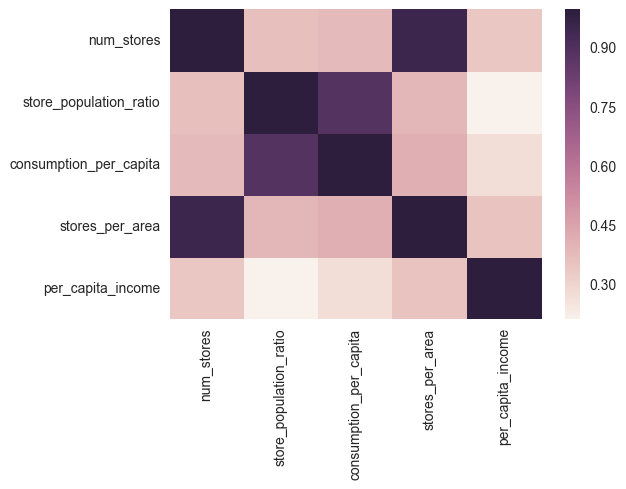

In [283]:
sns.heatmap(df_final[cols_to_keep].corr())

In [284]:
cols_to_keep_2 = ['sale_dollars','num_stores', 'store_population_ratio', 'consumption_per_capita', 'stores_per_area', u'per_capita_income', u'median_household_income', u'median_family_income']
df_final[cols_to_keep_2].corr()[['sale_dollars']].iloc[1:]

sale_dollars
num_stores                   0.995047
store_population_ratio       0.344187
consumption_per_capita       0.388819
stores_per_area              0.961106
per_capita_income            0.348343
median_household_income      0.190911
median_family_income         0.340245

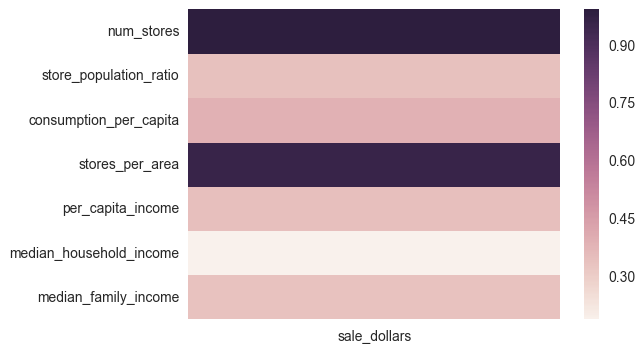

In [286]:
sns.heatmap(df_final[cols_to_keep_2].corr()[['sale_dollars']].iloc[1:]);

Let us generate scatter plots for all the predictors. They provide similar information as the correlation matrices.

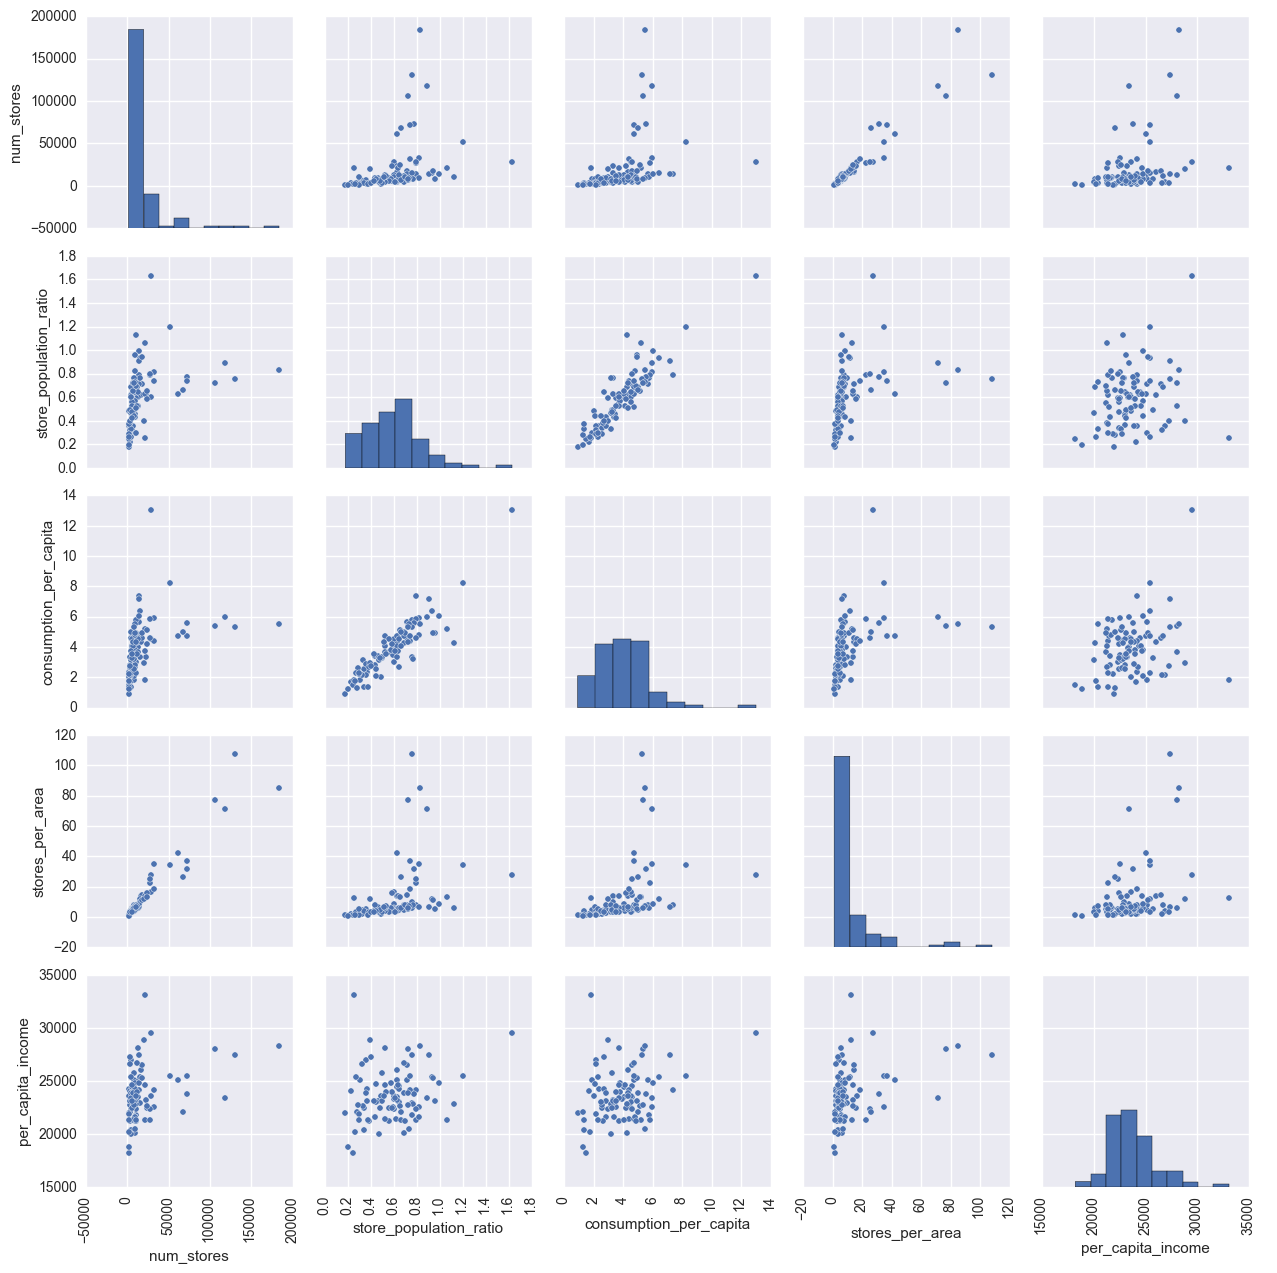

In [288]:
g = sns.pairplot(df_final[cols_to_keep])
for ax in g.axes.flatten():    # from [6]
    for tick in ax.get_xticklabels(): 
        tick.set(rotation=90);

# 7) Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [289]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

Let us first take a look at the 10 best performing counties (recall that we dropped Polk as an outlier):

In [290]:
df_final_sorted = df_final.copy()
df_final_sorted.sort_values("sale_dollars", inplace=True, ascending=False)
df_final_sorted[['county','sale_dollars']].head(10)

county  sale_dollars
55           Linn  1.806775e+07
79          Scott  1.397399e+07
50        Johnson  1.237021e+07
6      Black Hawk  1.192076e+07
94       Woodbury  7.695638e+06
75  Pottawattamie  7.675324e+06
82          Story  6.730961e+06
30        Dubuque  6.621999e+06
16    Cerro Gordo  4.892826e+06
28     Des Moines  3.579586e+06

In [291]:
df_final_sorted[['county','sale_dollars']].tail(10)

county  sale_dollars
56     Louisa     207146.11
26    Decatur     176364.48
86  Van Buren     174245.69
4     Audubon     159547.63
52     Keokuk     149560.78
77   Ringgold     138680.81
84     Taylor     110598.35
90      Wayne     105438.35
1       Adams     100596.80
25      Davis      96185.96

In [292]:
print df_final.columns.tolist()

['county', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'profit', 'num_stores', 'average_store_profit', 'sales_per_litters', 'population', 'store_population_ratio', 'consumption_per_capita', 'area', 'stores_per_area', u'per_capita_income', u'median_household_income', u'median_family_income', u'number_of_households']


## Model Building

In [293]:
features = ['num_stores','population', 'store_population_ratio', \
 'consumption_per_capita',  'stores_per_area', u'per_capita_income']

In [294]:
X = df_final[features]
y = df_final['sale_dollars']

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [296]:
combs = []
for num in range(1,len(features)+1):
    combs.append([i[0] for i in list(itertools.combinations(features, num))])

We now create the training and testing data, instantiate the models and test all models you want:

In [297]:
lr = linear_model.LinearRegression(normalize=True)
ridge = linear_model.RidgeCV(cv=5)
lasso = linear_model.LassoCV(cv=5)
models = [lr,lasso,ridge]

Make a list of $R^2$ combinations:

In [298]:
r2_comb_lst = []
for comb in combs:        
    for m in models:
        model = m.fit(X_train[comb],y_train)
        r2 = m.score(X_test[comb], y_test)
        r2_comb_lst.append([round(r2,3),comb,str(model).split('(')[0]])

Find the best predictors using `itemgetter`:

In [299]:
import operator
r2_comb_lst.sort(key=operator.itemgetter(1))
print r2_comb_lst[-1]

[0.974, ['num_stores', 'population', 'store_population_ratio', 'consumption_per_capita', 'stores_per_area', u'per_capita_income'], 'RidgeCV']


The best predictors are:

In [300]:
r2_comb_lst[-1][1]

['num_stores',
 'population',
 'store_population_ratio',
 'consumption_per_capita',
 'stores_per_area',
 u'per_capita_income']

**Note:** Using

     str(model).split('(')[0]
  
  
on something like:
  
     LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))
     
we can extract only the model since we convert it to a string, split on `(` and get the first element

Dropping highly correlated predictors:

In [312]:
features=['population','store_population_ratio','stores_per_area',u'per_capita_income']

In [313]:
X = df_final[features]
y = df_final['sale_dollars']
ridge = linear_model.RidgeCV(cv=5)
model = ridge.fit(X,y)
print 'r-squared: {}'.format(model.score(X,y))

r-squared: 0.98031775254


In [314]:
coefficients = pd.DataFrame([features, model.coef_.tolist()], index=['feature', 'coefficients']).T
coefficients

feature coefficients
0              population      58.8369
1  store_population_ratio  1.05083e+06
2         stores_per_area      49967.5
3       per_capita_income     -71.6356

In [315]:
coefficients['coefficients'] = coefficients['coefficients'].astype(float)
coefficients = coefficients.sort_values(by='coefficients', ascending=False)

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

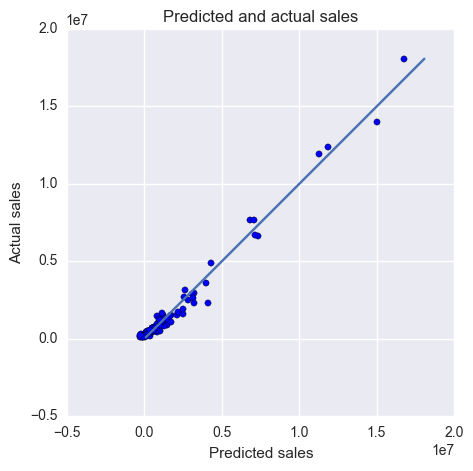

In [316]:
predicted = model.predict(X)
fig, ax = plt.subplots(figsize=(5,5));
plt.scatter(predicted, y);
plt.plot([min(y), max(y)], [min(y), max(y)], '-');
plt.title('Predicted and actual sales');
plt.xlabel('Predicted sales');
plt.ylabel('Actual sales');

In [317]:
pred = [round(p,0) for p in predicted]

## Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.


### Recommended counties

The counties with highest predicted total sales are below:

In [326]:
df_with_pred = df_final.copy()
df_with_pred['sales_prediction_dollars'] = pred
df_with_pred

county  bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
0           Adair           4455875           40182.62         6.037369e+04   
1           Adams           1757403           18103.82         2.717139e+04   
2       Allamakee           9079175           85371.49         1.282384e+05   
3       Appanoose           8360175           82458.44         1.238400e+05   
4         Audubon           2043175           17737.11         2.665607e+04   
5          Benton           7790725           71349.04         1.071595e+05   
6      Black Hawk         100801227         1107541.37         1.663275e+06   
7           Boone          16005831          154407.11         2.319393e+05   
8          Bremer          17767453          173326.87         2.603925e+05   
9        Buchanan          12168450          121504.75         1.824907e+05   
10    Buena Vista          20832831          226554.99         3.402451e+05   
11         Butler           3348800           27994.24         4.206102e+04   
12        Calhoun           3787450           30301.41         4.553630e+04   
13        Carroll          14460725          143097.04         2.149119e+05   
14           Cass          10038675           98657.96         1.481477e+05   
15          Cedar           7427125           67426.72         1.013055e+05   
16    Cerro Gordo          50439956          514818.96         7.732206e+05   
17       Cherokee           7638400           72195.69         1.084669e+05   
18      Chickasaw           4325975           37139.09         5.580234e+04   
19         Clarke           5656450           54720.08         8.218209e+04   
20           Clay          15084525          151187.65         2.270741e+05   
21        Clayton          11180875          108046.71         1.622809e+05   
22        Clinton          25808600          255757.84         3.841091e+05   
23       Crawford           9178228           91880.62         1.379796e+05   
24         Dallas          19782703          208239.38         3.128030e+05   
25          Davis           1623500           14206.10         2.134244e+04   
26        Decatur           1798250           17836.60         2.679681e+04   
27       Delaware           5929650           56982.70         8.557961e+04   
28     Des Moines          28965403          311376.14         4.674807e+05   
29      Dickinson          27326006          291810.42         4.382073e+05   
30        Dubuque          57322060          601825.15         9.038367e+05   
31          Emmet           5982525           60879.97         9.144739e+04   
32        Fayette           9109128           81374.00         1.222869e+05   
33          Floyd           8058678           79010.19         1.186743e+05   
34       Franklin           6146325           60180.12         9.038277e+04   
35         Greene           5200525           53392.20         8.019890e+04   
36         Grundy           4369250           36670.31         5.510175e+04   
37        Guthrie           3493600           31390.41         4.717285e+04   
38       Hamilton           7882325           77319.08         1.161721e+05   
39        Hancock           3509425           28221.14         4.241179e+04   
40         Hardin          15096700          136991.10         2.058020e+05   
41       Harrison           8333900           82437.45         1.238054e+05   
42          Henry           8214425           84936.53         1.275347e+05   
43         Howard           5501853           50667.53         7.612342e+04   
44       Humboldt           4838675           46974.26         7.055336e+04   
45            Ida           4907150           49504.88         7.433259e+04   
46           Iowa          11862800          102657.53         1.542814e+05   
47        Jackson          12728325          114843.67         1.724907e+05   
48         Jasper          21363900          214003.36         3.214453e+05   
49      Jefferson           6377025           66329.72       

We notice that some of the predicted values are negative. This also happened in other works [1] and the reason is not quite clear. We remove them.

In [332]:
df_pred = df_with_pred[df_with_pred['sales_prediction_dollars']>0]
df_pred

county  bottle_volume_ml  state_bottle_cost  state_bottle_retail  \
55           Linn         158353452         1731106.01         2.599613e+06   
79          Scott         112482102         1247750.11         1.873693e+06   
50        Johnson          94201143         1094410.17         1.643462e+06   
6      Black Hawk         100801227         1107541.37         1.663275e+06   
30        Dubuque          57322060          601825.15         9.038367e+05   
82          Story          65551096          727466.68         1.092625e+06   
94       Woodbury          61274387          672801.78         1.010242e+06   
75  Pottawattamie          64280187          680102.80         1.021141e+06   
16    Cerro Gordo          50439956          514818.96         7.732206e+05   
24         Dallas          19782703          208239.38         3.128030e+05   
28     Des Moines          28965403          311376.14         4.674807e+05   
22        Clinton          25808600          255757.84         3.841091e+05   
87        Wapello          24021278          251492.94         3.776542e+05   
68      Muscatine          28497706          294376.85         4.421020e+05   
54            Lee          24974375          267566.06         4.017307e+05   
62       Marshall          22552328          231546.74         3.477674e+05   
29      Dickinson          27326006          291810.42         4.382073e+05   
91        Webster          22537959          231995.40         3.484066e+05   
88         Warren          19568800          183359.55         2.753840e+05   
48         Jasper          21363900          214003.36         3.214453e+05   
61         Marion          19736978          199812.05         3.000452e+05   
10    Buena Vista          20832831          226554.99         3.402451e+05   
81          Sioux          10681100          102003.82         1.532028e+05   
7           Boone          16005831          154407.11         2.319393e+05   
8          Bremer          17767453          173326.87         2.603925e+05   
51          Jones          15309100          144067.53         2.164019e+05   
76      Poweshiek          16062900          169084.71         2.539540e+05   
20           Clay          15084525          151187.65         2.270741e+05   
9        Buchanan          12168450          121504.75         1.824907e+05   
60        Mahaska           9398550           96610.21         1.451289e+05   
13        Carroll          14460725          143097.04         2.149119e+05   
69        O'Brien          13896728          132245.41         1.986505e+05   
40         Hardin          15096700          136991.10         2.058020e+05   
89     Washington          10984531          119302.23         1.791272e+05   
71           Page          10230328          103322.96         1.551729e+05   
47        Jackson          12728325          114843.67         1.724907e+05   
93     Winneshiek          11450225          107156.18         1.609449e+05   
85          Union           9569175           90467.23         1.358550e+05   
65         Monona           9671381           95956.98         1.440858e+05   
58           Lyon           9776875           98319.84         1.476554e+05   
23       Crawford           9178228           91880.62         1.379796e+05   
42          Henry           8214425           84936.53         1.275347e+05   
3       Appanoose           8360175           82458.44         1.238400e+05   
32        Fayette           9109128           81374.00         1.222869e+05   
21        Clayton          11180875          108046.71         1.622809e+05   
73       Plymouth          12560609          132624.74         1.991814e+05   
14           Cass          10038675           98657.96         1.481477e+05   
33          Floyd           8058678           79010.19         1.186743e+05   
5          Benton           7790725           71349.04         1.071595e+05   
2       Allamakee           9079175           85371.49       

#### Higher aggregated sales

Let us order the counties with higher predicted sales:

In [333]:
df_pred.sort_values("sales_prediction_dollars", inplace=True, ascending=False)
df_pred[['county','sales_per_litters','population','stores_per_area','sales_prediction_dollars']].head(4)

county  sales_per_litters  population  stores_per_area  \
55        Linn          14.794975      221661        85.036195   
79       Scott          15.274967      172474       107.637548   
50     Johnson          15.770199      146547        77.091908   
6   Black Hawk          15.024919      132904        71.288290   

    sales_prediction_dollars  
55                16780528.0  
79                14997255.0  
50                11867678.0  
6                 11283189.0

In [337]:
df_pred.sort_values("population", inplace=True, ascending=False)
df_pred[['county','sales_per_litters','population','stores_per_area','sales_prediction_dollars']].head(4)

county  sales_per_litters  population  stores_per_area  \
55        Linn          14.794975      221661        85.036195   
79       Scott          15.274967      172474       107.637548   
50     Johnson          15.770199      146547        77.091908   
6   Black Hawk          15.024919      132904        71.288290   

    sales_prediction_dollars  
55                16780528.0  
79                14997255.0  
50                11867678.0  
6                 11283189.0

Linn has higher sales which in part is because it has larger population which is not very useful information.

#### More high-end stores

Let us order by `sales_per_litters` to see which county has more high-end stores. 

In [338]:
df_pred.sort_values("sales_per_litters", inplace=True, ascending=False)
df_pred[['county','sales_per_litters','population','stores_per_area','sales_prediction_dollars']].head(4)

county  sales_per_litters  population  stores_per_area  \
50     Johnson          15.770199      146547        77.091908   
79       Scott          15.274967      172474       107.637548   
28  Des Moines          15.174117       39739        34.976332   
24      Dallas          15.116572       84516        12.321483   

    sales_prediction_dollars  
50                11867678.0  
79                14997255.0  
28                 3968601.0  
24                 4125161.0

We see that Johnson has more high-end stores. We would recommend it *if the goal of the the owner is to build new high-end stores*. If the plan is to open more stores but with cheaper products, Johnson is not the place to choose.

#### Saturation

The less saturated market is Decatur. But as discussed before this information does not provide have a unique recommendation and a more thorough analysis is needed.

In [344]:
df_pred.sort_values("stores_per_area", inplace=True, ascending=True)
df_pred[['county','sales_per_litters','population','stores_per_area','sales_prediction_dollars']]

county  sales_per_litters  population  stores_per_area  \
26        Decatur          14.405203        8141         1.381434   
52         Keokuk          11.481359       10119         1.782675   
11         Butler          11.140858       14791         1.929501   
39        Hancock          10.906219       10835         2.159491   
12        Calhoun          11.491468        9846         2.275235   
18      Chickasaw          11.530256       12023         3.024458   
70        Osceola          12.745341        6064         3.081288   
66         Monroe          13.831367        7870         3.122350   
74     Pocahontas          11.572587        6886         3.211730   
63          Mills          12.719923       14972         3.249919   
43         Howard          12.414609        9332         3.345996   
57          Lucas          13.732379        8647         3.520855   
96         Wright          12.707313       12779         3.540219   
83           Tama          13.161979       17319         3.665790   
44       Humboldt          13.022925        9487         3.746353   
35         Greene          14.057818        9011         3.787770   
56         Louisa          13.987210       11142         3.802603   
0           Adair          12.631486        7092         3.856389   
36         Grundy          11.490660       12313         3.953866   
80         Shelby          13.687852       11800         4.331137   
32        Fayette          12.617454       20054         4.463878   
34       Franklin          12.705219       10170         4.494475   
45            Ida          14.260037        6985         4.498609   
27       Delaware          13.760907       17327         4.507389   
41       Harrison          13.162064       14149         4.563865   
5          Benton          12.189062       25699         4.865202   
81          Sioux          13.538806       34898         5.012698   
21        Clayton          13.195825       17590         5.023060   
78            Sac          12.323453        9876         5.066547   
23       Crawford          13.822321       16940         5.215863   
2       Allamakee          12.613783       13884         5.238733   
49      Jefferson          14.068272       18090         5.247219   
17       Cherokee          13.059553       11508         5.273883   
31          Emmet          12.847230        9658         5.368912   
72      Palo Alto          12.884834        9047         5.430014   
59        Madison          13.323817       15848         5.529360   
14           Cass          13.252889       13157         5.622151   
73       Plymouth          13.826506       25200         5.830208   
19         Clarke          13.696300        9309         5.866678   
67     Montgomery          13.382034       10225         5.886740   
92      Winnebago          12.001155       10631         5.918678   
3       Appanoose          13.375589       12462         5.961273   
38       Hamilton          12.940146       15076         6.035600   
65         Monona          13.660539        8898         6.049634   
47        Jackson          12.838469       19472         6.067410   
53        Kossuth          13.700965       15114         6.318563   
58           Lyon          13.718707       11754         6.344742   
42          Henry          14.271205       19773         6.566097   
33          Floyd          13.846056       15873         6.601745   
15          Cedar          12.724413       18454         6.621344   
93     Winneshiek          13.295288       20561         6.640300   
85          Union          13.231373       12420         6.979412   
89     Washington          14.579561       22281         7.047676   
64       Mitchell          12.110916       10763         7.569967   
71           Page          14.035741       15391         7.618095   
46           Iowa          12.607737       16311         7.708391   
40         Hardin          13.009862       17226         7.769505   
60       

#### Competition

The county with weaker competition is Butler. This could provided untapped potential. However, the absence of a reasonable number of stores may indicate, as observed before, that the county's population is simply not interested in this category of product. Again, further investigation must be carried out.

In [347]:
df_pred.sort_values("store_population_ratio", inplace=True, ascending=True)
df_pred[['county','sales_per_litters','population','stores_per_area','sales_prediction_dollars','store_population_ratio']]

county  sales_per_litters  population  stores_per_area  \
11         Butler          11.140858       14791         1.929501   
26        Decatur          14.405203        8141         1.381434   
24         Dallas          15.116572       84516        12.321483   
63          Mills          12.719923       14972         3.249919   
52         Keokuk          11.481359       10119         1.782675   
39        Hancock          10.906219       10835         2.159491   
81          Sioux          13.538806       34898         5.012698   
5          Benton          12.189062       25699         4.865202   
27       Delaware          13.760907       17327         4.507389   
56         Louisa          13.987210       11142         3.802603   
18      Chickasaw          11.530256       12023         3.024458   
36         Grundy          11.490660       12313         3.953866   
49      Jefferson          14.068272       18090         5.247219   
12        Calhoun          11.491468        9846         2.275235   
66         Monroe          13.831367        7870         3.122350   
88         Warren          13.217243       49691        12.129877   
96         Wright          12.707313       12779         3.540219   
32        Fayette          12.617454       20054         4.463878   
60        Mahaska          13.342219       22181         7.949059   
83           Tama          13.161979       17319         3.665790   
15          Cedar          12.724413       18454         6.621344   
42          Henry          14.271205       19773         6.566097   
57          Lucas          13.732379        8647         3.520855   
80         Shelby          13.687852       11800         4.331137   
70        Osceola          12.745341        6064         3.081288   
59        Madison          13.323817       15848         5.529360   
93     Winneshiek          13.295288       20561         6.640300   
33          Floyd          13.846056       15873         6.601745   
73       Plymouth          13.826506       25200         5.830208   
44       Humboldt          13.022925        9487         3.746353   
89     Washington          14.579561       22281         7.047676   
23       Crawford          13.822321       16940         5.215863   
43         Howard          12.414609        9332         3.345996   
38       Hamilton          12.940146       15076         6.035600   
35         Greene          14.057818        9011         3.787770   
62       Marshall          14.875434       40312        15.464035   
34       Franklin          12.705219       10170         4.494475   
21        Clayton          13.195825       17590         5.023060   
22        Clinton          13.627250       47309        16.674016   
19         Clarke          13.696300        9309         5.866678   
9        Buchanan          13.504469       20992         8.803275   
74     Pocahontas          11.572587        6886         3.211730   
2       Allamakee          12.613783       13884         5.238733   
7           Boone          13.277107       26532        14.083864   
0           Adair          12.631486        7092         3.856389   
30        Dubuque          14.393144       97003        42.015240   
48         Jasper          12.996996       36708        13.740373   
31          Emmet          12.847230        9658         5.368912   
61         Marion          14.093066       33189        13.708075   
17       Cherokee          13.059553       11508         5.273883   
41       Harrison          13.162064       14149         4.563865   
47        Jackson          12.838469       19472         6.067410   
91        Webster          14.315835       36769        13.442294   
67     Montgomery          13.382034       10225         5.886740   
94       Woodbury          15.012023      102779        26.139797   
45            Ida          14.260037        6985         4.498609   
46           Iowa          12.607737       16311         7.708391   
3       A

## References

[1] https://jocelyn-ong.github.io/iowa-liquor-sales

[2] https://medium.com/@neil.liberman/where-to-open-a-liquor-store-in-iowa-bb85af614563

[3] https://www.youtube.com/watch?v=PL_GBlcBNCk&t=725s)

[4] https://goo.gl/nTwV6J

[5] https://www.iowa-demographics.com/counties_by_population

[6] https://github.com/mwaskom/seaborn/issues/1126

[7] Karamshuk et al: Geo-spotting: mining online location-based services for optimal retail store placement 

# Appendix 

### Appendix A

Consider the following two columns of the original dataset:

In [311]:
df_raw[['State Bottle Cost','State Bottle Retail']].head()

State Bottle Cost State Bottle Retail
0            $18.09              $27.14
1            $18.09              $27.14
2             $6.40               $9.60
3            $35.55              $53.34
4             $6.40               $9.60

The state of Iowa is a wholesale seller to its stores. The cost above is the amount paid per ordered bottle by the Alcoholic Beverages Division and the retail prices are actually the prices stores paid to the State. In the dataset there is no information regarding the end user (the consumer). Following previous works we will use the difference between these columns as a proxy for profit. This can be done approximately if one assumes e.g. that the profit margin is essentially flat and we then set the retail price as end user price. Also, we must assume that the delay between the purchase from the State and the sale to the end user is not too large.